# ASTR3110 Tutorial 5: Principal Component Analysis

Tutorial 5 of the *'Data Science Techniques in Astrophysics'* course at Macquarie University.

## Learning outcomes from this tutorial

 * Understand what is meant by dimensionality reduction.
 * Understand what principal axes are and how they relate to variance.
 * Use SciKit Learn to identify principal axes on a simple 2D dataset.
 * Understand how to select the axes containing most information.
 * Use PCA to show how an image-based dataset decomposes into clusters in 2D.
 * Use PCA to filter noise from images.

## Setup

This week, we won't need to access any data on disk, so simply start a new *Python 3* notebook on Google Colab. The tutorial content is based on a section of the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas (you can access this very handy book if you are on the MQ VPN, and by signing in with your MQ email). Additional content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).

In [87]:
# Import necessary modules and set plots to appear inline
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

## Introduction to Principal Component Analysis

Principal Component Analysis (PCA) is a method of reducing the *dimensionality* of multi-dimensional data. We start by identifying the axes along which information is maximised (called the *principal axes*) and can then choose to collapse one or more of the smaller (i.e., least important) of these axes by projecting the data along this axis. We can illustrate this on an artificially generated 2D dataset.

Now plot the data on a scatter plot to get a feel for it.

It is clear from this plot that the most significant principal axis is along the line of best correlation and the next most significant axes is at 90-degrees to that. We can determine the vectors of these axes by using the PCA implementation in *SciKit Learn*. 

Like the MCMC fitter we encountered last week, the results are stored inside the ```myPCA``` object. For a detailed explanation access the help by executing ```myPCA??```. The important variables are ```myPCA.mean_```, ```myPCA.components_``` and ```myPCA.explained_variance_```.

Now plot the vectors over the data:

In [ ]:
# First define a short function to plot an arrow
# I'll simply explain this code to avoid typing it out.
# Basically, it's a way to overlay arrows on a data plot.
def draw_vector(startCoord, endCoord, ax=None):
    """Function to draw a vector on a plot."""

    # By default, set the axis to the current one
    if ax is None:
        ax = plt.gca()#gca = get current axis. This sets the axis to the axis set by plt.scatter below.

    # Set the arrow properties as a dictionary
    arrowprops = dict(arrowstyle='->', linewidth=2, color='r')

    # Annotate the plot with a blank label and an arrow
    ax.annotate('', endCoord, startCoord, arrowprops=arrowprops)

In [1]:
# Plot the data


In [2]:
#zip explanation


Note that your data and axis directions may be different to the above plot. SciKit Learn has a function to transform the data onto the orthogonal principal axes. Do the transformation and plot:

In [3]:
# Transform the data onto the PCA axes


This transformation from data axes to principal axes is an *affine transformation*, which basically means it is composed of a translation, rotation, and uniform scaling.

### PCA as dimensionality reduction

Using PCA for dimensionality reduction involves zeroing out one or more of the smallest principal components, resulting in a lower-dimensional projection of the data that preserves the maximal data variance.

Try using PCA for dimensionality reduction by collapsing the least-useful axis.

In [4]:
# Make a new PCA object with only one dimension


We can transform this data back to understand what the effect of reducing it to a single dimension has been:

In [5]:
# Transform the data back


You can see that the information along the least-important axis has been removed. The fraction of variance that is cut out (proportional to the spread of points about the line formed in this figure) is roughly a measure of how much "information" is discarded in this reduction of dimensionality.

This reduced-dimension dataset is "good enough" to encode the most important relationships between the points: despite reducing the dimension of the data by 50%, the overall relationship between the data points are mostly preserved.

## PCA for Visualisation

Here we use a simple set of images as a toy example: small images of hand-written digits from the MNIST dataset (a very commonly used image dataset in the machine-learning world and the simplest 'hello world' example for many ML algorithms; MNIST = Modified National Institute of Standards and Technology database). 

SciKit Learn has access to this dataset built-in:

In [6]:
# Load the digits dataset


There are 1797 elements in the dataset, each of length 64.These are 8x8 pixel images that have been flattened.

In [7]:
# Access a single member of the dataset


In [8]:
# Reshape the 1D array back to a 2D (8x8) image and plot


In [9]:
#show digits.target

The data consists of 8×8 pixel images, meaning that they are 64-dimensional. To gain some intuition into the relationships between these points, we can use PCA to project them to a more manageable number of dimensions, say two:

In [10]:
# Project from 64 to 2 dimensions


We can now plot the first two principal components of each point to learn about the data:

In [ ]:
# We can colorise the data using the ground-truth labels
# that are also encoded in digits.target

plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target,        # <- colour by ground truth label
            edgecolor='none', 
            alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))#jet is quantised to have 10 colours. One for each of our labels 0-9

# Add labels
plt.xlabel('Projected Component 1')
plt.ylabel('Projected Component 2')
plt.colorbar()

In [ ]:
#plotting a single tartget digit, we can see that in PCA-space they 
#often occupy relatively distinct regions.
target=2
plt.scatter(projected[digits.target == 2, 0], projected[digits.target == 2, 1],
            edgecolor='none', 
            alpha=0.5,
            fc='k')



You can see here that images containing the same hand-written digits cluster in different regions of the projected 2D space. The full data for each digit is a 64-dimensional point cloud, and the points in the plot are the projection of each data point along the 2 directions with the largest variance. Essentially, we have found the optimal stretch and rotation in 64-dimensional space that allows us to see the layout of the digits in two dimensions, and have done this in an unsupervised manner.

You can imagine this being useful in a real world situation where you don't have the "labels". You can use PCA to to identify types of objects that lie in semi-distinct parts of a multi-dimensional PCA space (where the number of PCA dimensions is reduced compared with the entire original dataset). This is very useful for object classification.

### What do the components mean?

The PCA components can be thought of as *basis functions* - building blocks, the cumulative combination of which make up the whole picture. PCA gives the ability to order these in importance and select only the ones containing information on the *signal* in the data. See [here](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.09-Principal-Component-Analysis.ipynb) for a more full explanation.

### Choosing the number of components

A vital part of using PCA in practice is the ability to estimate how many components are needed to describe the data.
This can be determined by looking at the cumulative *explained variance ratio* as a function of the number of components. This is the ratio of the variance explained by the currently accepted components to the total variance.

In [15]:
# Find the PCA components and do not restrict the
# number of components found (fully describe the data)


This curve quantifies how much of the total, 64-dimensional variance is contained within the first $N$ components.
For example, we see that with the digits the first 10 components contain approximately 75% of the variance, while you need around 50 components to describe close to 100% of the variance.

A good selection here might be choosing to fit 20 components to retain 90% of the information. Note that that last 10% may be dominated by noise.

## PCA as Noise Filtering

PCA can also be used as a filtering approach for noisy data.
The idea is this: any components with variance much larger than the effect of the noise should be relatively unaffected by the noise.
So if you reconstruct the data using just the largest subset of principal components, you should be preferentially keeping the signal and throwing out the noise.

Let's see how this looks with the digits data. First we will plot several of the input noise-free data:

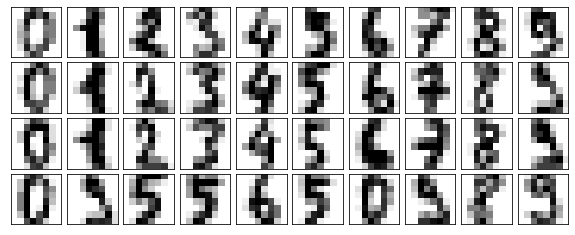

In [70]:
# Define a function to plot the images
def plot_digits(data, nRows=4):
    """Plot rows of images from the MNIST digits dataset."""
    
    
    # Setup the figure
    fig = plt.figure(figsize=(10, nRows))
    axes = fig.subplots(nRows, 10, 
                        subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))
    
    # Loop through the axes, plotting the images
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='gray_r', interpolation='nearest',
                  clim=(0, 16))

# Call the plotting function to plot the 1st 4 rows
plot_digits(digits.data, 4)

Now we can add some noise to the data:

In [12]:
# Now add some random noise


A human observer can still make out which digits are in the images. Now see how PCA can identify the axes with information content and then filter on these to remove noise.

Here 50% of the variance amounts to 12 principal components.
Now we compute these components, and then use the inverse of the transform to reconstruct the filtered digits:

In [13]:
# Transform data into PCA space with 12 axes


In [14]:
#compare with the original and noisy data.
